### Feature Extraction (특징 추출)

## Text Embedding

In [1]:
!pip install gensim

In [3]:
import gensim.downloader as api # 사전 학습된 워드 임베딩 모델(GloVe, Word2Vec 등)을 다운로드
import numpy as np

glove_model = api.load('glove-wiki-gigaword-300') # 단어별로 300차원 벡터 반환
sentence = ['Golden', 'State', 'Warriors']
for word in sentence:
  print(glove_model[word.lower()].shape) # glove는 보통 소문자로 저장
print(glove_model[word.lower()])

(300,)
(300,)
(300,)
[-3.6050e-01  3.2712e-02  1.7043e-01 -3.5128e-01  3.6191e-01  1.4902e-01
  2.5806e-01  7.8000e-01  3.9881e-01  8.2020e-01 -1.5545e-02 -5.1899e-01
 -2.4580e-01  1.3896e-01 -3.5175e-01  3.0182e-01  4.6940e-01 -8.1877e-02
 -5.6574e-01  2.1466e-01 -2.8734e-02 -5.2753e-01  9.5989e-01  4.8753e-01
  5.3076e-01 -5.3177e-01 -1.6288e-02 -6.0056e-01  3.9416e-01  3.5728e-01
  7.6826e-01 -4.1815e-01 -4.0760e-01 -7.0264e-01 -4.8779e-01 -6.6039e-01
  7.7728e-01  4.4171e-01  6.9584e-01 -2.1107e-01  1.5220e-01 -1.3009e-01
 -5.1019e-01  7.8507e-02  1.3434e-01 -6.7298e-02  8.6117e-02  2.6477e-01
  9.7963e-02 -3.6808e-01 -2.2226e-01 -5.9807e-02 -8.9367e-01 -1.5312e-01
  2.5925e-01 -6.4573e-01 -1.5902e-02  5.8547e-01  2.5366e-01  2.3854e-01
 -4.2033e-01 -1.4619e-01 -8.6096e-02 -1.4953e-01  5.1264e-01  1.2725e-01
 -2.0272e-01  2.5538e-01  3.7828e-01  7.8151e-02  4.7887e-01  6.4850e-01
  5.3304e-02  5.7149e-02 -4.4234e-01  2.7850e-01  5.1671e-01 -5.7767e-01
  2.2633e-02 -3.7541e-01 -3.72

## Iamge Embedding

In [13]:
import torch
import torch.nn as nn
from torchvision import models, transforms # 사전 학습된 모델 가져오기, 이미지 전처리
from PIL import Image # 이미지 파일 불러오기 위함

transform = transforms.Compose([
    transforms.Resize((224,224)), # 정사각형으로 리사이즈
    transforms.ToTensor()
])

img = Image.open('jpeg.jpeg')
img_tensor = transform(img).unsqueeze(0) # 배치 차원 추가 / 딥러닝은 배치단위로 동작하기 떄문에 추가
print(img_tensor.size())

resnet = models.resnet50(pretrained=True)

print(nn.Sequential(*list(resnet.children()))) # ResNet 구조 출력

# 이미지 임베딩(특징 벡터)만 얻고 싶기 때문에 분류기(FC 레이어 제거)
resnet = nn.Sequential(*list(resnet.children())[:-1])

img_embedding = resnet(img_tensor)

print(img_embedding.shape)
print(img_embedding.squeeze().shape)

torch.Size([1, 3, 224, 224])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


## Speech Embedding

torch.Size([2, 109368])
44100


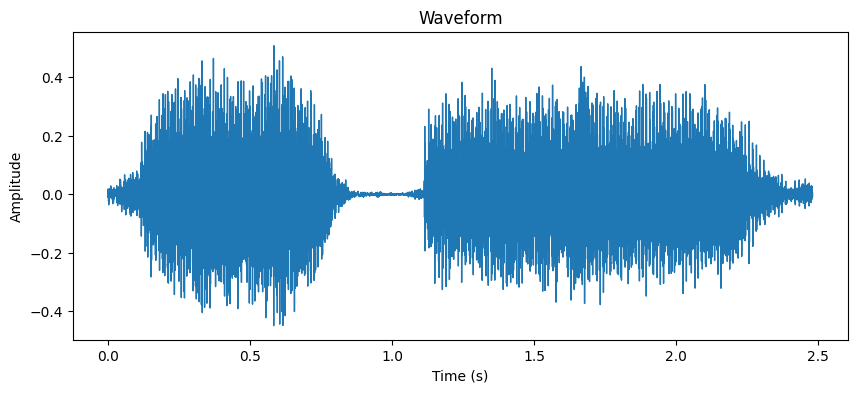

Waveform shape: torch.Size([2, 109368])
Sample rate: 44100


/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


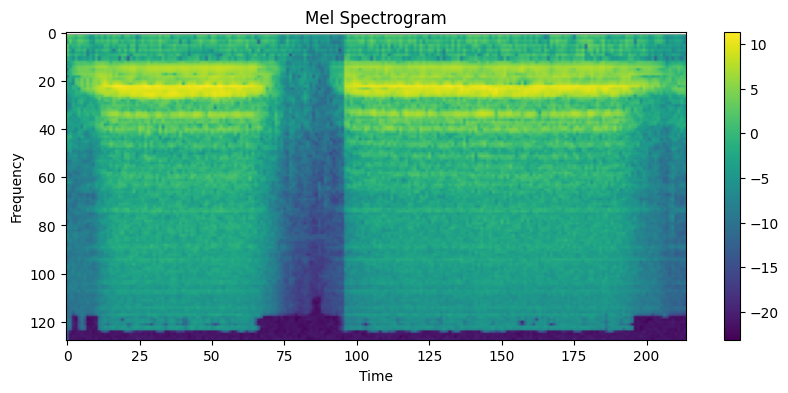

Mel Spectrogram shape: torch.Size([2, 128, 214])


In [28]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# 오디오 파일 로드
waveform, sample_rate = torchaudio.load('/content/steam-train-whistle-daniel_simon.wav')
print(waveform.shape) # 오디오 신호 데이터를 담고 있는 (채널수, 샘플수) [2, 109368]
print(sample_rate) # Hz 44100

# 109368 / 44100  = 2.48초

# 시간 축 계산
num_channels, num_frames = waveform.shape
time_axis = torch.arange(0, num_frames) / sample_rate

# 원본 파형 그리기
plt.figure(figsize=(10, 4))
plt.plot(time_axis, waveform[0], linewidth=1)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# 정보 출력
print(f"Waveform shape: {waveform.shape}")
print(f"Sample rate: {sample_rate}")

# Mel Spectrogram 변환. 딥러닝에 넣을 때는 주파수 성분으로 넣어야됨.
# n_fft : 주파수 해상도 결정, n_mels : mel 필터 갯수
transform = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=1024, n_mels=128)
mel_spectrogram = transform(waveform)

# Mel Spectrogram 그리기
plt.figure(figsize=(10, 4))
# 데이터 스케일 조정
plt.imshow(mel_spectrogram.log2()[0].numpy(), cmap='viridis', aspect='auto') #imshow는 파이토치 텐서 직접 사용 불가능
plt.title("Mel Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

# [채널, Mel 필터 수, 시간축의 프레임 ]
print(f"Mel Spectrogram shape: {mel_spectrogram.shape}")


이미지 데이터를 시각화. 2D 데이터를 이미지로 변환 -> imshow
현재까지 생성된 모든 플롯을 화면에 출력, 모든 그래프를 화면에 표시 -> show